# Spectrograms of seismology signals

This notebook is an introduction of spectrograms of earthquake and non-earthquake signals.

A spectrogram is a visual representation of the range of frequencies for a given time. They are useful for seismology because they show how signals change over time, giving clues otherwise not obvious from raw data about the events.

The first code block will important all of the utilities we need.

In [2]:
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

## Set parameters

The first spectrogram examples we will consider are a comparison of an earthquake and an explosion with similar energy release (magnitude ~ 3) from a similar location. 

We will examine the IU.TUC.00.BHZ recordings for these events, which are available from the IRIS data center. 

The next code block will set the parameters for that station's recordings.

In [15]:
channel = "BHZ"
network = "IU"
client = Client("IRIS")
station = "TUC"
location = "00"

# We will first examine data from an earthquake near the Arizona-New Mexico border starting at 06:15:50 UTC time on July 11, 2014.
startt = UTCDateTime("2014-07-11T06:15:50")
endt = UTCDateTime("2014-07-11T06:17:50")

# Request two minutes of waveform data
st = client.get_waveforms(network, station, location, channel, startt, endt)

## Extract seismic trace and plot

The next code block will extract the seismic trace from the stream object and plot a seismogram.

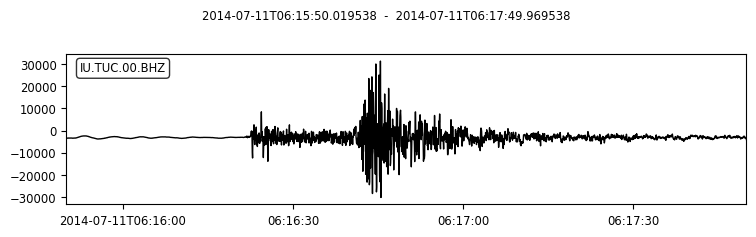

In [9]:
tr = st[0]
fig = tr.plot()

## Graph the seismic trace

The next code block will create the spectrogram.

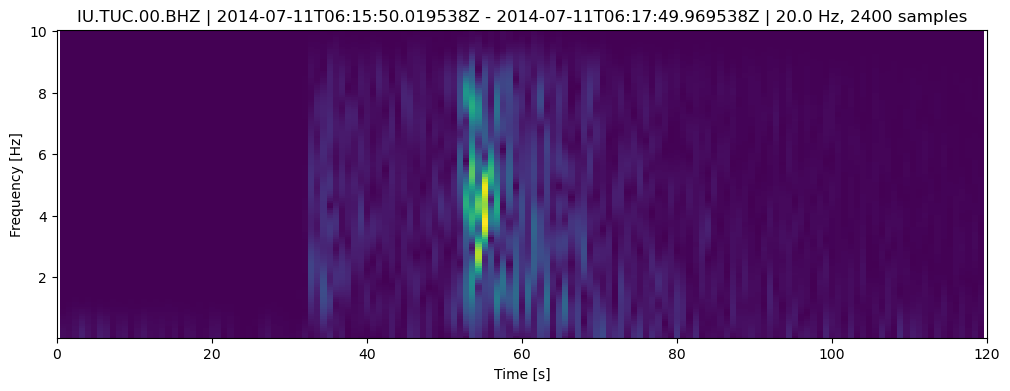

In [10]:
plt.rcParams['figure.figsize'] = (12, 4)
fig = tr.spectrogram(per_lap=.5, wlen=2)

The energy starts abruptly, ends gradually and an abrupt burst (<10 s) of energy can be seens across almost all observed frequencies.

Next we will examine a spectrogram from an explosion of similar size at the same station.

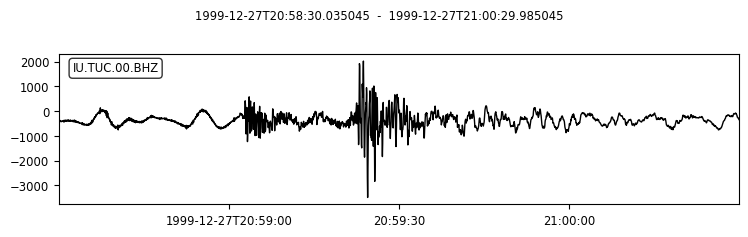

In [17]:
# This event is December 27, 1999 at 20:58:30
endt = UTCDateTime("1999-12-27T21:00:30")
startt = UTCDateTime("1999-12-27T20:58:30")
st = client.get_waveforms(network, station, location, channel, startt, endt)

# Plot the seismogram
tr = st[0]
fig = tr.plot()

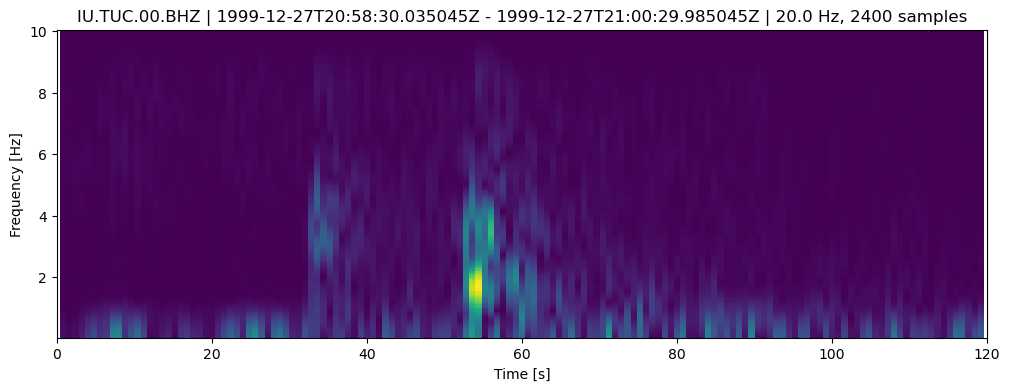

In [13]:
# Graph the spectrogram
plt.rcParams['figure.figsize'] = (12, 4)
fig = tr.spectrogram(per_lap=.5, wlen=2)

The spectrogram reveals large differences that were not readily apparent from the plot. The explosion is confined to lower frequencies. 

## Examining seismic data in Antarctica

Next we will explore signals from Antarctica.

The next code block will set the parameters for the new location.

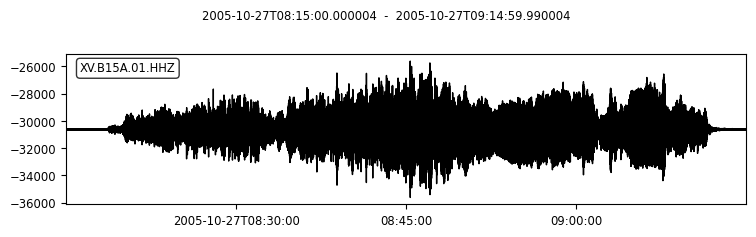

In [19]:
client = Client("IRIS")
net = "XV"
sta = "B15A"
loc = "01"
cha = "HHZ"

# We will select one hour of data from October 27, 2005 at 08:15:00.
startt = UTCDateTime("2005-10-27T08:15:00")
endt = UTCDateTime("2005-10-27T09:15:00")

# Obtain the waveform data
st = client.get_waveforms(net, sta, loc, cha, startt, endt)

# Extract trace and plot the seismogram
tr = st[0]
fig = tr.plot()

The signal is a lot longer than the earthquake in New Mexico and the explosion but does not have clear P and S wave arrivals.

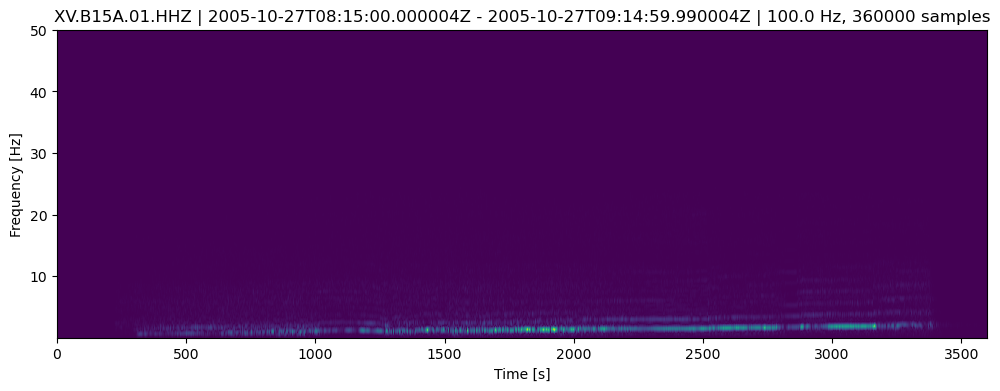

In [20]:
# Graph the spectrogram
plt.rcParams['figure.figsize'] = (12, 4)
fig = tr.spectrogram(per_lap=.5, wlen=2)

A very small amount of energy in a thin line at the bottom of the plot.

In the next code block we will limit the spectrogram's range to make it more useful using the spectrogram data.

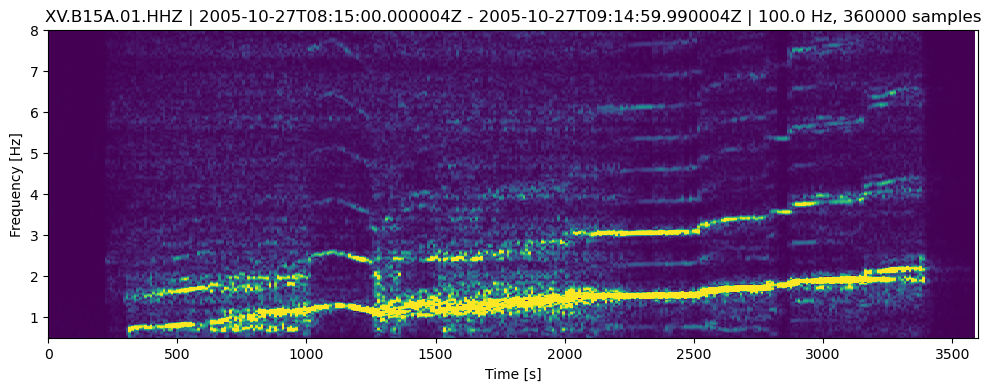

In [22]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=25)
ax = fig.axes[0]
ax.set_ylim(0.5, 8)
im = ax.images[0]
im.set_clim(vmax=800)

The energy has an abrupt start and end, but there is sustained energy strongest at a particular frequency that gradually glides from lower to higher frequencies over time. The sustained energy is repeated as the frquency increases over time.

## 2002 Denali earthquake

Next we will examine the effects of the 2002 Magnitude 7.8 Denali earthquake on the San Andreas Fault.

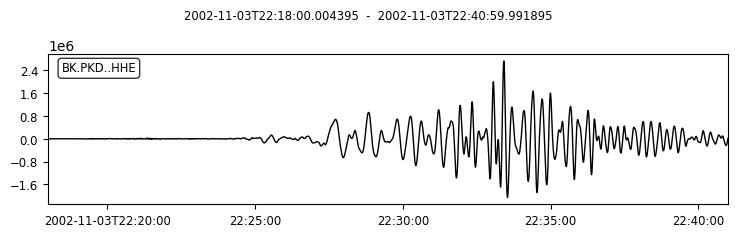

In [25]:
#Set parameters
client = Client("NCEDC")
net = "BK"
sta = "PKD"
loc = ""
cha = "HHE"
startt = UTCDateTime("2002-11-03T22:18")
endt = UTCDateTime("2002-11-03T22:41")

# Obtain the waveform data
st = client.get_waveforms(net, sta, loc, cha, startt, endt)

# Extract trace and plot the seismogram
tr = st[0]
fig = tr.plot()

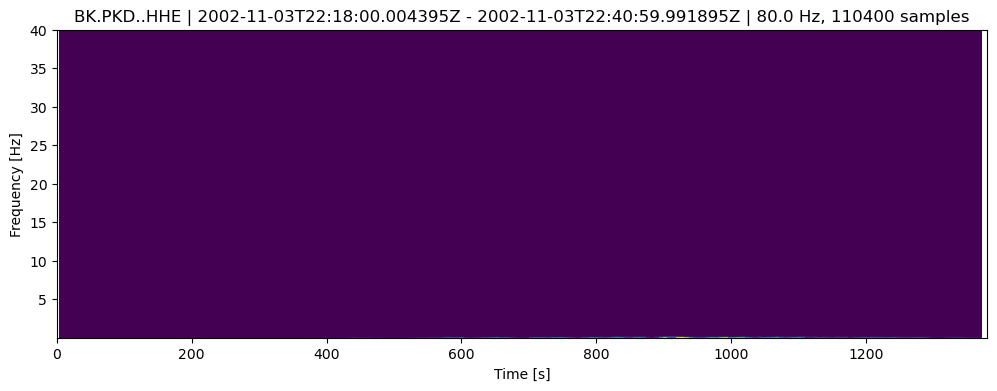

In [29]:
# Generate the spectrogram with 
fig = tr.spectrogram(per_lap=.5, wlen=10)

The energy at low frequencies from the surface waves of such a larger earthquake are too big to see anything at high frequency. For example, we cannot see the P wave, which would have energy around 1 Hz. One way to deal with this is to change the amplitude scale to a decibel-type logarithmic system. This would bring the very large amplitudes close to the smaller amplitudes on the color scale.

In the next code block, we use the dbscale and log parameters to accomplish this.

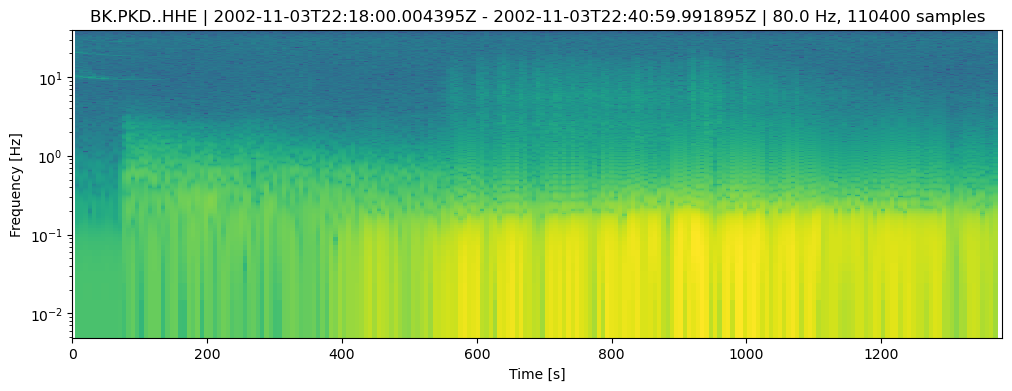

In [30]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=10, log=True, dbscale=True)

The spectrogram allows us to see features and details we could not see in the seismogram.

In the next code block, we will limit the frequency range to focus on this and go back to a linear scale instead of log.

(-96.34717168809901, 134.0755363067488)


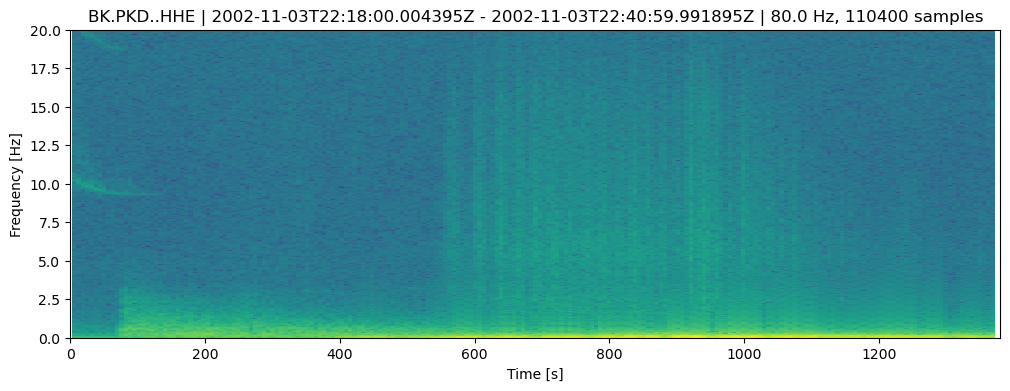

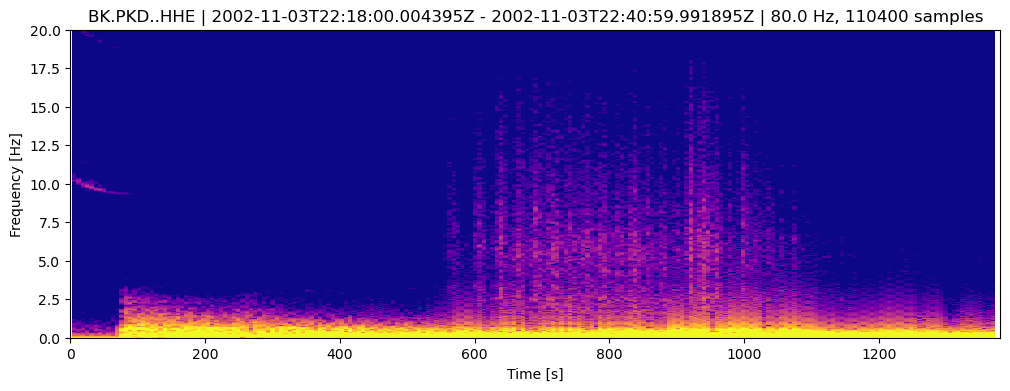

In [35]:
fig = tr.spectrogram(show=False, per_lap=.5, wlen=10, dbscale=True)
ax = fig.axes[0]
ax.set_ylim(0, 20)
im = ax.images[0]
print(im.get_clim())

# Enhance signals in the popular plasma color scheme
vmin = 144 - 134
vmax = vmin + 60

fig = tr.spectrogram(show=False, per_lap=.5, wlen=10, dbscale=True, cmap='plasma')
ax = fig.axes[0]
ax.set_ylim(0, 20)
im = ax.images[0]
im.set_clim(vmin, vmax)

Since this visually-enhanced spectrogram reveals some high frequency signals that we cannot see in the original seismogram, we can use a filter to see these signals in the seismogram. When modifying seismograms in ObsPy, it is often a good idea to create a new copy of the seismogram and then apply the modifications to it.

In the next code block we will make a copy of the trace object.

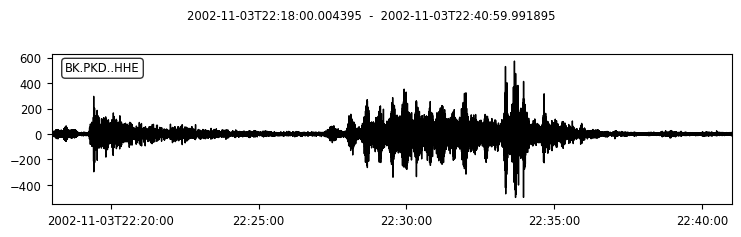

In [36]:
ftr = tr.copy()

ftr.filter(type='bandpass', freqmin=2.0, freqmax=20.0)

# Plot the seismogram
fig = ftr.plot()

With the filtered data, we can find tremors caused in one area caused by earthquakes somewhere else. In this case, these tremors in San Andreas were caused by the Denali earthquake's surface waves.